# Statistical Mechanics Midterm Asignment
## Felix Semler
## S3898547

Notation:
I use $\mathcal{Z}$ for the partition function due to habit

### A:

Using the Quantum Harmonic oscillator formulation we know that the energy levels are:
\begin{equation}
 E_n = (n+\frac{1}{2}) \hbar\omega
\end{equation}

As we are modelling N 3-dimensional coupled oscillators, or equivalently 3N 1-dimensional independent oscillators with differing oscillation frequencies we require that omega be the average oscillation frequency denoted as $\omega_E$

Furthermore, we can get rid of the $E_0$ energy as it is constant and does not contribute to the thermodynamic properties

We define the partition function for a discrete ensemble as :
\begin{equation}
 \mathcal{Z} \equiv \sum_{n} e^{-E_n\beta}
\end{equation}

So we can write:
\begin{equation}
 \mathcal{Z} = \sum_{n=0}^{\infty} e^{-n\hbar\omega_E\beta}
\end{equation}

for individual phonons.

As our phonons are independent (or assumed to be so) a system with 3N vibrational modes will be the product of each phonons partition function

\begin{equation}
 \mathcal{Z} = \prod_{k=1}^{3N} \mathcal{Z}_k
\end{equation}

We can rewrite our individual phonon partition function using:
\begin{equation}
 \sum_{x=0}^{\infty} e^{cx} = \frac{1}{1-e^c}
\end{equation}

Which gives us:
\begin{equation}
 \mathcal{Z}_k = \sum_{n=0}^{\infty} e^{-n\hbar\omega_E\beta} =  \frac{ 1}{1-e^{-\hbar\omega_E\beta}}
\end{equation}

So that the systems partition function is:

\begin{equation}
 \mathcal{Z} = \prod_{k=1}^{\infty} \frac{ 1}{1-e^{-\hbar\omega_E\beta}}
\end{equation}


### B:

The average occupational number is given as:
\begin{equation}
\braket{n_i}=-\frac{1}{\beta}\frac{\partial}{\partial (\hbar \omega_i)} \log \mathcal{Z}
\end{equation}

Now to work this out:
\begin{equation}
\log\mathcal{Z} = - \sum_{i=1}^{3N} \log(1-e^{-\hbar\beta\omega_i})
\end{equation}

\begin{equation}
\frac{\partial}{\partial \hbar\omega_i}  \log(1-e^{-\hbar\beta\omega_i}) = \frac{-\beta e^{-\beta\hbar\omega_i}}{1-e^{-\hbar\beta\omega_i}}
\end{equation}

So we get:

\begin{equation}
\braket{n_i}=-\frac{\beta}{\beta}\frac{e^{-\beta\hbar\omega_i}}{e^{-\hbar\beta\omega_i}-1}
\end{equation}

Which becomes:

\begin{equation}
\braket{n_i}=\frac{1}{e^{\hbar\beta\omega_i}-1}
\end{equation}

### C:

Internal Energy is given as:
\begin{equation}
U = -\frac{\partial}{\partial \beta}\log \mathcal{Z}
\end{equation}

For the entire system
\begin{equation}
\frac{\partial}{\partial \beta}\log \mathcal{Z} = -\sum_{i=1}^{3N} \frac{\hbar \omega_i}{e^{\beta\hbar\omega_i}-1}
\end{equation}

So we have:
\begin{equation}
U    = \sum_{i=1}^{3N} \frac{\hbar \omega_i}{e^{\beta\hbar\omega_i}-1}
\end{equation}


D: 
The heat capacity can be found using:
\begin{equation}
C_v = \frac{\partial U}{\partial T}
\end{equation}
and the Deby



# TODO: Book page 280 has derivation where does VOlume come from



## E:

In [1]:
import numpy as np
import scipy
import scipy.constants as cst

In [2]:
#Temperature in K - Specific Heat (cal/mol/K)
data = np.loadtxt('./diamond.dat', delimiter=' ', skiprows=2)

Conversion const. 4184 J/cal

Here the equation from slide 28 lecture 11 will be utilized (with k moved to the other side)

note that our heat capacity is specific, so that it is equivalent to $C_V/mol=C_V/N_A=C_V/N$ since $mol = N_A$ particles and $N_A=N$ for these measurements


TODO : Data wrong tell prof

In [49]:
x_dat = data[:,0] 
y_dat = data[:,1]*4.184/(3*cst.k*cst.Avogadro)#/ () # cal-> J and move constants over





def heat_capactity(T, T_E):
    return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )


#Alternate form
#def heat_capactity(T, T_E):
#    return T_E**2*(1/(np.sinh(T_E/2*T)**2))/(4*T**2)


# Low T form:
#def heat_capactity(T, T_E):
#    return (T_E/T)**2 * (np.exp(-T_E/T) )# / ((np.exp(T_E/T))-1)**2 )


T_E, pcov = scipy.optimize.curve_fit(heat_capactity, x_dat, y_dat,p0=[298])
T_E=T_E[0]

/tmp/ipykernel_3734149/3035032900.py:9: RuntimeWarning: overflow encountered in exp
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_3734149/3035032900.py:9: RuntimeWarning: invalid value encountered in true_divide
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_3734149/3035032900.py:9: RuntimeWarning: overflow encountered in square
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )


In [50]:
T_E

709.7827025809898

/tmp/ipykernel_3734149/3035032900.py:9: RuntimeWarning: overflow encountered in exp
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_3734149/3035032900.py:9: RuntimeWarning: invalid value encountered in true_divide
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )


Text(0.5, 1.0, 'Normalized heat capacity vs normalized temperature for a diamond')

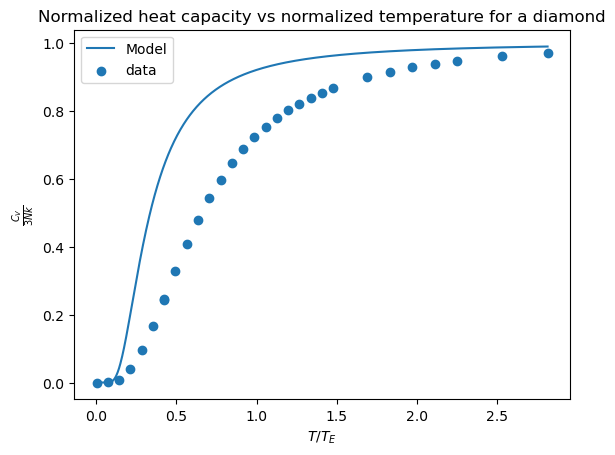

In [51]:
import matplotlib.pyplot as plt
x = np.linspace(0.1,x_dat.max(),1000)
plt.plot(x/T_E,heat_capactity(x, T_E=T_E), label='Model')
plt.scatter(x_dat/T_E,y_dat,label='data')
plt.xlabel(r'$T/T_E$')
plt.ylabel(r'$\frac{C_V}{3Nk}$')
plt.legend()
plt.title('Normalized heat capacity vs normalized temperature for a diamond')

/tmp/ipykernel_3734149/3035032900.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_3734149/3035032900.py:9: RuntimeWarning: invalid value encountered in multiply
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )


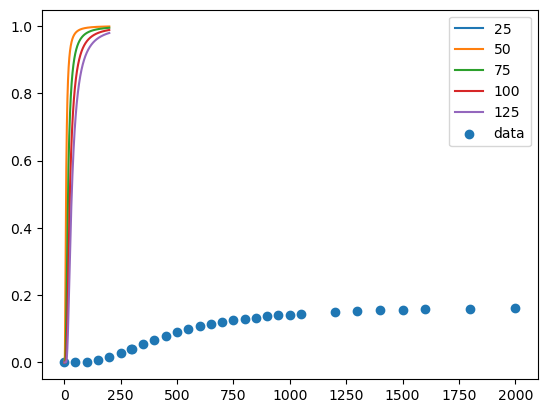

In [30]:
for i in range(5):
    T_E = (i+0)*25
    T=np.linspace(1,200,20000)
    #plt.plot(T,((T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )), label=(i+1)*25)
    plt.plot(T,heat_capactity(T,T_E), label=(i+1)*25)
plt.scatter(x_dat,y_dat/6,label='data')
plt.legend()

In [124]:
x_dat

array([4.00907850e-02, 2.00453925e+00, 4.00907850e+00, 6.01361775e+00,
       8.01815700e+00, 1.00226963e+01, 1.19470539e+01, 1.20272355e+01,
       1.40317748e+01, 1.60363140e+01, 1.80408533e+01, 2.00453925e+01,
       2.20499318e+01, 2.40544710e+01, 2.60590103e+01, 2.80635495e+01,
       3.00680888e+01, 3.20726280e+01, 3.40771673e+01, 3.60817065e+01,
       3.80862458e+01, 4.00907850e+01, 4.20953243e+01, 4.81089420e+01,
       5.21180205e+01, 5.61270990e+01, 6.01361775e+01, 6.41452560e+01,
       7.21634130e+01, 8.01815700e+01])

## F:

In [ ]:
def debye(T,T_D):